<a href="https://colab.research.google.com/github/Nomimomi/A1-QP-MPC-Controller/blob/main/%E2%80%9CR_%2B_brms%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------

## R Code

In [3]:
install.packages("foreign")
install.packages("bkmr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘dotCall64’, ‘sandwich’, ‘spam’, ‘maps’, ‘mvtnorm’, ‘gmm’, ‘fields’, ‘truncnorm’, ‘tmvtnorm’




In [4]:
library(bkmr)
library(foreign)


For guided examples, go to 'https://jenfb.github.io/bkmr/overview.html'



In [6]:
data.DM<-read.spss("颜妍重积分有机磷农药.sav",to.data.frame=TRUE)


Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Duplicated levels in factor Etrimfos四分位: , , ”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Duplicated levels in factor Chlorpyrifos四分位: , , ”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Duplicated levels in factor Fenitrothion四分位: , , ”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Duplicated levels in factor Parathion四分位: , , ”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Undeclared level(s) 3.342305865, 4.032832568, 4.595813495, 5.625659839 added in variable: Etrimfos四分位数中位数”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Duplicated levels in factor Etrimfos四分位数中位数: , , ”
Warning message in read.spss("颜妍重积分有机磷农药.sav", to.data.frame = TRUE):
“Undeclared level(s) 4.421028574, 4.505985008, 4.618221644, 4.909386668 added in variable: Chlorpyrifos四分位数中位数”
Warning message in read.spss("颜妍重积分有机

In [7]:
covar <- data.matrix(data.DM[,c("Sex","Age08","Edu","Smoking08","Drinking08","PA.final08","BMI08","糖尿病家族史")])
expos<-data.matrix(data.DM[125:128])
Y<-data.DM$GLU08
colnames(covar) <- paste0("X", 1:ncol(covar))
colnames(expos) <- paste0("z", 1:ncol(expos))
scale_expos <- scale(expos)
set.seed(1000)

In [8]:

fitkm <- kmbayes(Y, Z = scale_expos, X = covar, iter = 10000,
                 verbose = FALSE, varsel = TRUE)

Iteration: 1000 (10% completed; 17.08468 mins elapsed)

Iteration: 2000 (20% completed; 34.15036 mins elapsed)

Iteration: 3000 (30% completed; 51.26349 mins elapsed)

Iteration: 4000 (40% completed; 1.14076 hours elapsed)

Iteration: 5000 (50% completed; 1.4285 hours elapsed)

Iteration: 6000 (60% completed; 1.71638 hours elapsed)

Iteration: 7000 (70% completed; 2.00086 hours elapsed)

Iteration: 8000 (80% completed; 2.2875 hours elapsed)

Iteration: 9000 (90% completed; 2.57548 hours elapsed)

Iteration: 10000 (100% completed; 2.8604 hours elapsed)



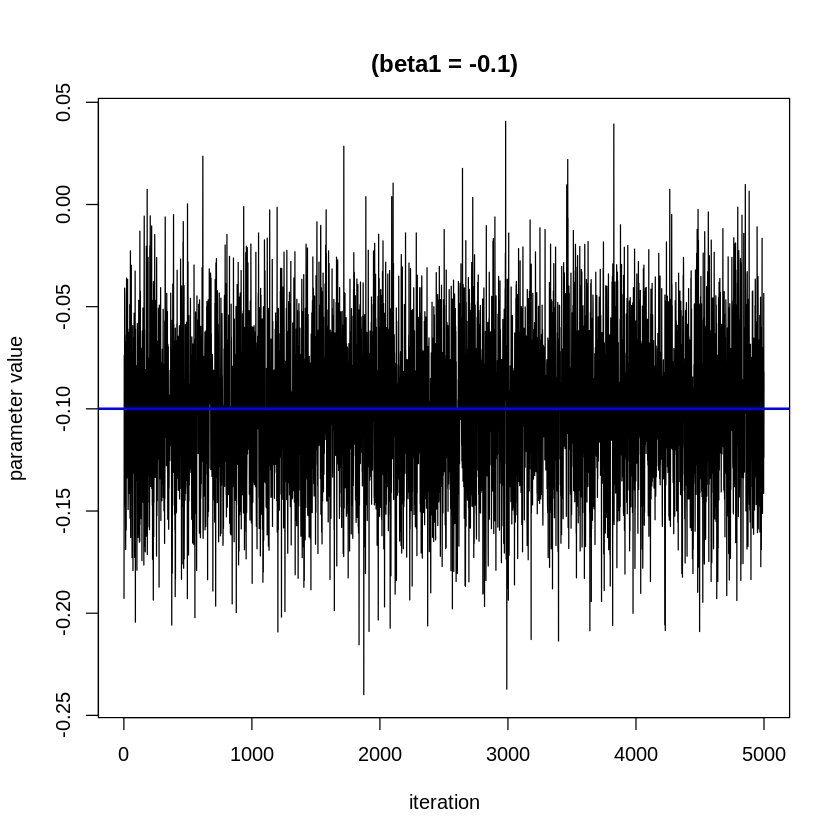

ERROR: Error in samps[, comp]: subscript out of bounds


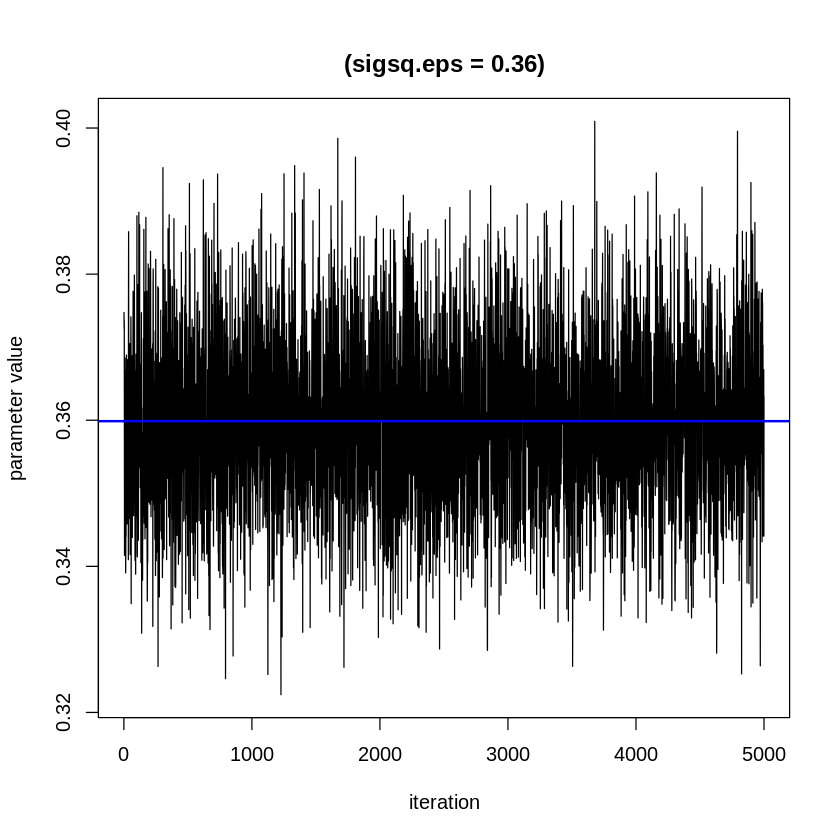

In [9]:
TracePlot(fit = fitkm, par = "beta")
TracePlot(fit = fitkm, par = "sigsq.eps")
TracePlot(fit = fitkm, par = "r",comp=7)
ExtractPIPs(fitkm)

In [11]:
 install.packages("tidyverse")
 install.packages("ggplot2")
 library(ggplot2)
 library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


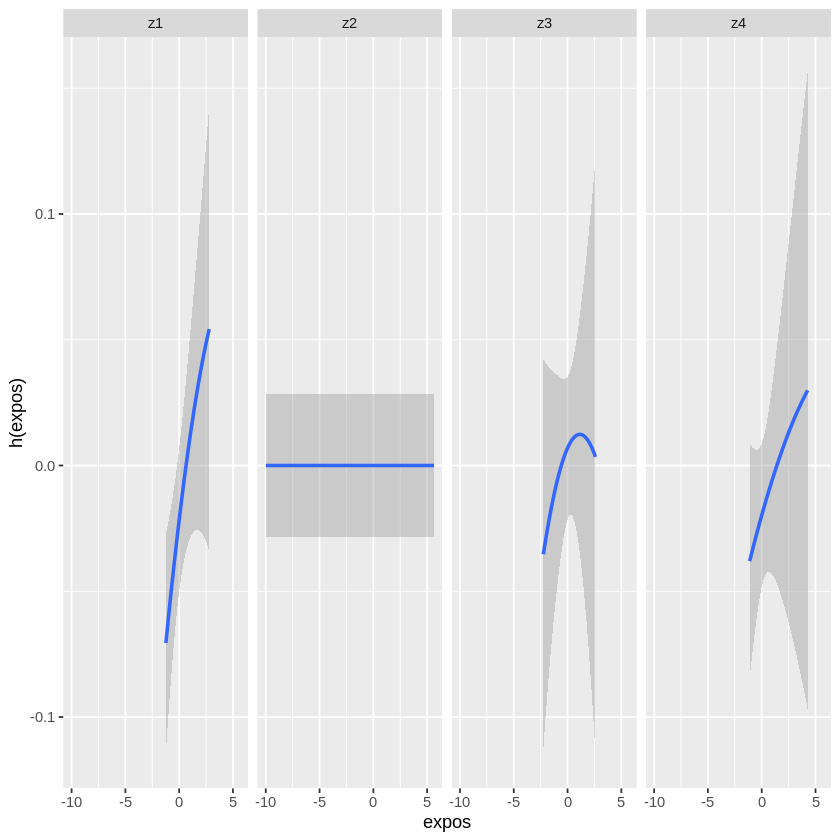

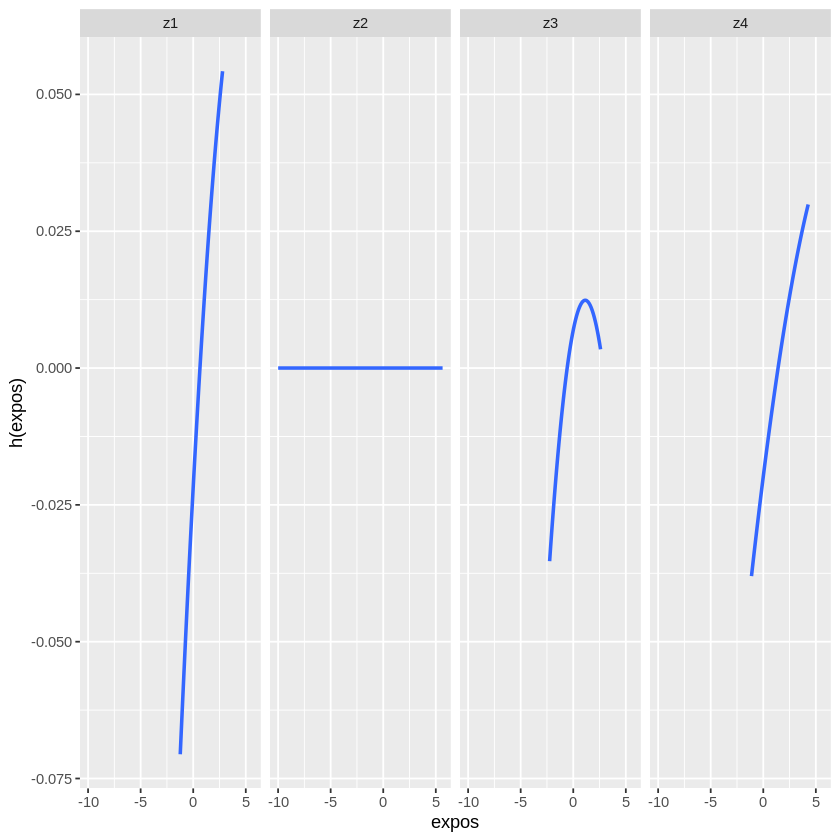

In [12]:
PredictorResponseUnivarq.fixedq.fixed = 0.75
pred.resp.univar <- PredictorResponseUnivar(fit = fitkm)
ggplot(pred.resp.univar, aes(z, est, ymin = est - 1.96*se,
                             ymax = est + 1.96*se)) +
  geom_smooth(stat = "identity") +
  facet_wrap(~variable, ncol = 4) +
  xlab("expos") +
  ylab("h(expos)")
ggplot(pred.resp.univar, aes(z, y=est)) +
  geom_smooth(stat = "identity") +
  facet_wrap(~variable, ncol = 4) +
  xlab("expos") +
  ylab("h(expos)")

In [13]:
expos.pairs <- subset(data.frame(expand.grid(expos1 = c(1,2,3,4), expos2 = c(1,2,3,4))), expos1 < expos2)
expos.pairs
pred.resp.bivar <- PredictorResponseBivar(fit = fitkm,
                                          min.plot.dist = 0.5,
                                          z.pairs = expos.pairs)

,expos1,expos2
,<dbl>,<dbl>
5,1,2
9,1,3
10,2,3
13,1,4
14,2,4
15,3,4


Pair 1 out of 6

Pair 2 out of 6

Pair 3 out of 6

Pair 4 out of 6

Pair 5 out of 6

Pair 6 out of 6



Warning message:
“Removed 443 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


quantile,est,sd
<dbl>,<dbl>,<dbl>
0.25,-0.051225850,0.019094326
0.30,-0.043149824,0.018047534
0.35,-0.035970332,0.017306744
0.40,-0.016565454,0.006474483
0.45,-0.008127836,0.002979643
0.50,0.000000000,0.000000000
0.55,0.008082158,0.003075695
0.60,0.015482152,0.005920265
0.65,0.022065434,0.008554226


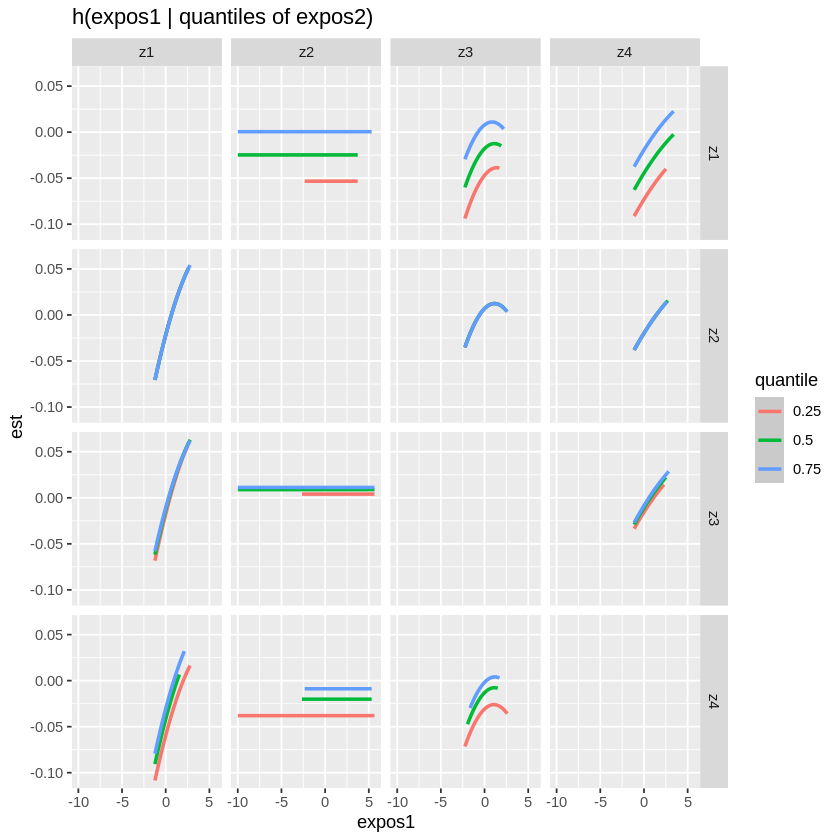

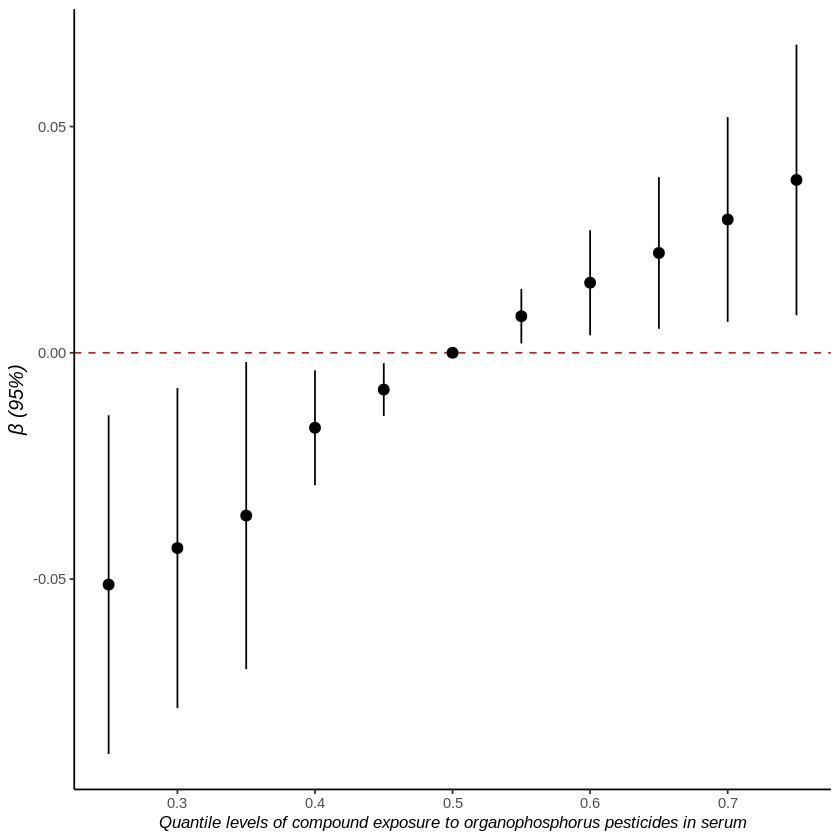

In [14]:
pred.resp.bivar.levels <- PredictorResponseBivarLevels(
  pred.resp.bivar,scale_expos,qs = c(0.25, 0.5, 0.75))
ggplot(pred.resp.bivar.levels, aes(z1, est)) +
  geom_smooth(aes(col = quantile), stat = "identity") +
  facet_grid(variable2 ~ variable1) +
  ggtitle("h(expos1 | quantiles of expos2)") +
  xlab("expos1")
risks.overall <- OverallRiskSummaries(fit = fitkm, qs = seq(0.25, 0.75, by = 0.05), q.fixed = 0.5)
risks.overall
ggplot(risks.overall, aes(quantile, est, ymin = est - 1.96*sd,
                          ymax = est + 1.96*sd)) +
  geom_hline(yintercept = 0, lty = 2, col = "brown") +
  theme_classic()+
  geom_pointrange() +
  xlab("Quantile levels of compound exposure to organophosphorus pesticides in serum")+
  theme(axis.title.x = element_text(face="italic",
                                    size=10))+
  ylab("β (95%)")+
  theme(axis.title.y = element_text(face="italic",
                                    size=12))

q.fixed,variable,est,sd
<fct>,<fct>,<dbl>,<dbl>


q.fixed,variable,est,sd
<fct>,<fct>,<dbl>,<dbl>
0.25,z1,0.054437832,0.02028607
0.25,z2,0.000000000,0.00000000
0.25,z3,0.008499881,0.01667843
0.25,z4,0.029388456,0.02949938
0.5,z1,0.052353935,0.02039979
0.5,z2,0.000000000,0.00000000
0.5,z3,0.007174995,0.01568312
0.5,z4,0.029943318,0.02898275
0.75,z1,0.050577595,0.02123100


est          est          est          est          est          est 
 0.014677138  0.000000000 -0.024189846 -0.028430335  0.012370354  0.000000000 
         est          est          est          est          est          est 
-0.023563920 -0.026862876  0.008964842  0.000000000 -0.024855571 -0.026298200

est        est        est        est        est        est        est 
0.09419853 0.00000000 0.04118961 0.08720725 0.09233752 0.00000000 0.03791391 
       est        est        est        est        est 
0.08674951 0.09219035 0.00000000 0.03600856 0.08704228

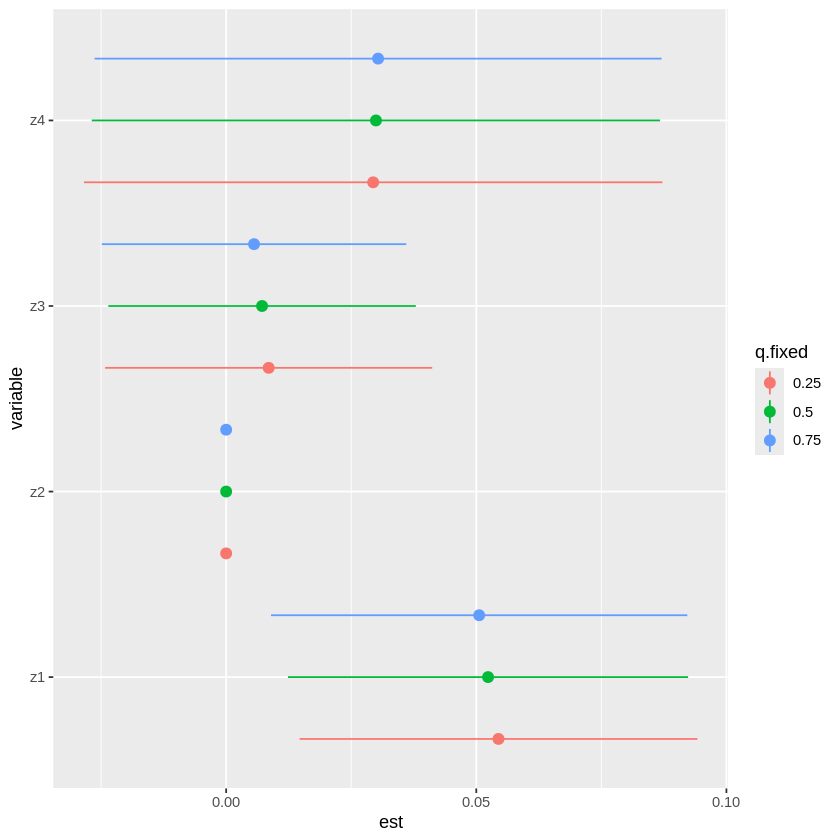

In [15]:
risks.singvar <- SingVarRiskSummaries(
  fit = fitkm, qs.diff = c(0.25, 0.75),
  q.fixed = c(0.25, 0.50, 0.75))
subset(risks.singvar, variable %in% c("Etrimfos","Chlorpyrifos","Fenitrothion","Parathion"))
risks.singvar
risks.singvar.ymin<-risks.singvar$est-1.96*risks.singvar$sd
risks.singvar.ymin
risks.singvar.ymax<-risks.singvar$est+1.96*risks.singvar$sd
risks.singvar.ymax
ggplot(risks.singvar, aes(variable, est, ymin = est - 1.96*sd, ymax = est + 1.96*sd,
                          col = q.fixed)) +
  geom_pointrange(position = position_dodge(width = 1)) + coord_flip()

In [ ]:
save.image(file='result.RData')